In [29]:
import numpy
import wget
import os
import numpy as np
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
import argparse
import cv2
from matplotlib import pyplot as plt
%matplotlib inline



In [30]:
dir_path = '/Users/michevan/Desktop/insight/demo'
if not os.path.exists(dir_path):
    os.makedir(dir_path)


In [32]:
url = 'https://cdn.shopify.com/s/files/1/1749/6693/products/Bagels_Sesame_solo_square_2048x2048.jpg?v=1523069646'

    
image_filename = '/Users/michevan/Desktop/insight/demo/image.jpg'
print('Beginning file download with wget module')
print(url)
wget.download(url, image_filename)  


Beginning file download with wget module
https://cdn.shopify.com/s/files/1/1749/6693/products/Bagels_Sesame_solo_square_2048x2048.jpg?v=1523069646


'/Users/michevan/Desktop/insight/demo/image.jpg'

In [33]:
MODELS = {
	"vgg16": VGG16,
	"vgg19": VGG19,
	"inception": InceptionV3,
	"xception": Xception, # TensorFlow ONLY
	"resnet": ResNet50
}
 
# esnure a valid model name was supplied via command line argument
model_name = "xception"

In [34]:
# initialize the input image shape (224x224 pixels) along with
# the pre-processing function (this might need to be changed
# based on which model we use to classify our image)
inputShape = (224, 224)
preprocess = imagenet_utils.preprocess_input
 
# if we are using the InceptionV3 or Xception networks, then we
# need to set the input shape to (299x299) [rather than (224x224)]
# and use a different image processing function
if model_name in ("inception", "xception"):
    inputShape = (299, 299)
    preprocess = preprocess_input

In [35]:
print("[INFO] loading {}...".format(model_name))
Network = MODELS[model_name]
model = Network(weights="imagenet")

[INFO] loading xception...


In [36]:
print("[INFO] loading and pre-processing image...")

probs = np.zeros(5); labels = np.zeros(5,dtype='a32')
image = load_img(image_filename, target_size=inputShape)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess(image)
print("[INFO] classifying image with '{}'...".format(model_name))
preds = model.predict(image)
P = imagenet_utils.decode_predictions(preds)
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))
    probs[i] = prob
    labels[i] = label


[INFO] loading and pre-processing image...
[INFO] classifying image with 'xception'...
1. bagel: 98.22%
2. bakery: 0.03%
3. pretzel: 0.02%
4. cheeseburger: 0.02%
5. Granny_Smith: 0.02%


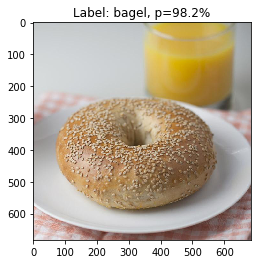

In [37]:
orig = cv2.imread(image_filename)

(imagenetID, label, prob) = P[0][0]
plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
plt.title("Label: {}, p={:.1f}%".format(label, prob * 100))
plt.show()